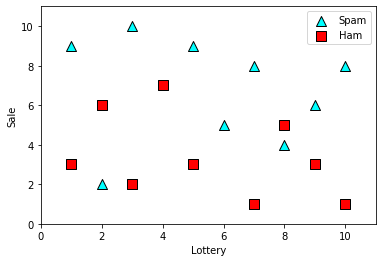

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from matplotlib import pyplot

# Some functions to plot our points and draw the lines
def plot_points(features, labels, fix_margins=True):
    X = np.array(features)
    y = np.array(labels)
    spam = X[np.argwhere(y==1)]
    ham = X[np.argwhere(y==0)]
    if fix_margins:
        pyplot.xlim(0, 11)
        pyplot.ylim(0, 11)
    pyplot.scatter([s[0][0] for s in spam],
                [s[0][1] for s in spam],
                s = 100,
                color = 'cyan',
                edgecolor = 'k',
                marker = '^')
    pyplot.scatter([s[0][0] for s in ham],
                [s[0][1] for s in ham],
                s = 100,
                color = 'red',
                edgecolor = 'k',
                marker = 's')
    pyplot.xlabel('Lottery')
    pyplot.ylabel('Sale')
    pyplot.legend(['Spam','Ham'])

def plot_model(X, y, model, fix_margins=True):
    X = np.array(X)
    y = np.array(y)
    plot_points(X, y)
    plot_step = 0.01
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    if fix_margins:
        x_min=0
        y_min=0
        x_max=12
        y_max=12
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    pyplot.contourf(xx, yy, Z, colors=['red', 'blue'], alpha=0.2, levels=range(-1,2))
    pyplot.contour(xx, yy, Z,colors = 'k',linewidths = 3)
    pyplot.show()

def display_tree(dt):
    from sklearn.externals.six import StringIO  
    from IPython.display import Image  
    from sklearn.tree import export_graphviz
    import pydotplus
    dot_data = StringIO()
    export_graphviz(dt, out_file=dot_data,  
                    filled=True, rounded=True,
                    special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())
    
def plot_trees(model):
    estimators = gradient_boosting_model.estimators_
    for i in range(len(estimators)):
        tree.plot_tree(estimators[i][0])
        pyplot.show()
        #plot_model(new_X, new_y, estimators[i][0])
        
def plot_regressor(model, features, labels):
    x = np.linspace(0,85,1000)
    pyplot.scatter(features, labels)
    pyplot.plot(x, model.predict(x.reshape([-1,1])))
    pyplot.xlabel("Age")
    pyplot.ylabel("Days per week")
    pyplot.show()
    
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

np.random.seed(0)

# Spam Email dataset
emails = np.array([
    [7,8,1],
    [3,2,0],
    [8,4,1],
    [2,6,0],
    [6,5,1],
    [9,6,1],
    [8,5,0],
    [7,1,0],
    [1,9,1],
    [4,7,0],
    [1,3,0],
    [3,10,1],
    [2,2,1],
    [9,3,0],
    [5,3,0],
    [10,1,0],
    [5,9,1],
    [10,8,1],
])
spam_dataset = pd.DataFrame(data=emails, columns=["Lottery", "Sale", "Spam"])
spam_dataset
        
features = spam_dataset[['Lottery', 'Sale']]
labels = spam_dataset['Spam']
plot_points(features, labels)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


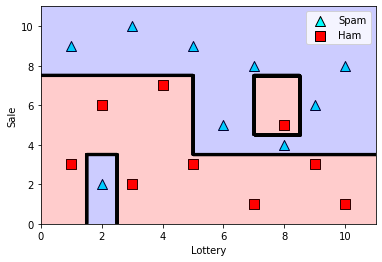

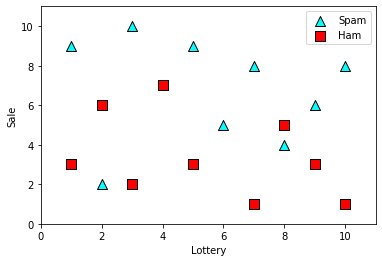

In [7]:
# Decision Tree
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
decision_tree_classifier.fit(features, labels)
decision_tree_classifier.score(features, labels)

# Draw decision tree
display_tree(decision_tree_classifier)
# Decision tree as map
plot_model(features, labels, decision_tree_classifier)
plot_points(features, labels)

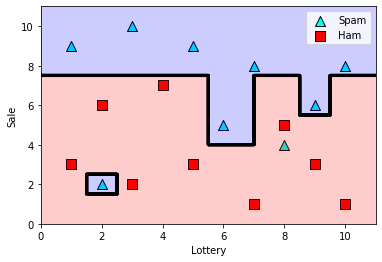

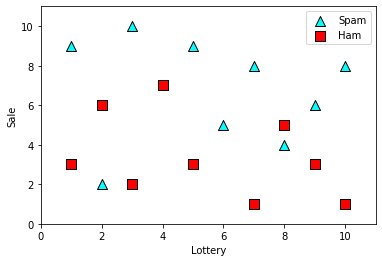

In [10]:
import warnings
warnings.filterwarnings('ignore')

# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
random_forest_classifier.fit(features, labels)
random_forest_classifier.score(features, labels)

# Plotting Random Forest classifier
plot_model(features, labels, random_forest_classifier)
plot_points(features, labels)

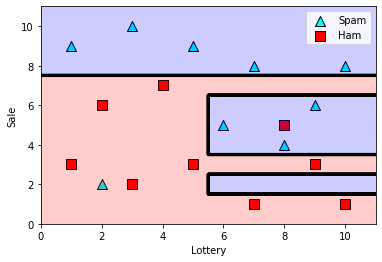

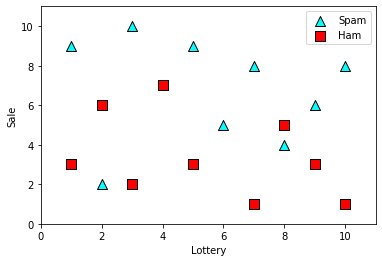

In [11]:
# ADA Boost
from sklearn.ensemble import AdaBoostClassifier
adaboost_classifier = AdaBoostClassifier(n_estimators=10, learning_rate=0.5, random_state=42)
adaboost_classifier.fit(features, labels)
adaboost_classifier.score(features, labels)

# Plotting Ada Boost Classifier
plot_model(features, labels, adaboost_classifier)
plot_points(features, labels)